In [21]:
### September Arctic sea ice extent timeries analysis of CESM2-LE, CESM2-lessmelt (formerly tunedice,tunedalbedo, or TI) and Observations
### last updated Nov 18, 2021
### contains code for Figures 10a,10b,10c,11c,12a,12c,S9 of Kay et al. (2022) JAMES
### author: Jennifer.E.Kay@colorado.edu

# libraries
from pathlib import Path 
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pickle
import os
import matplotlib.path as mpath
import numpy.linalg as LA
from matplotlib.gridspec import GridSpec
import timeit
from cartopy import config
import cartopy.crs as ccrs
import datetime
import scipy.stats as stats # imports stats functions https://docs.scipy.org/doc/scipy/reference/stats.html 
from cartopy.util import add_cyclic_point
import glob
import cartopy.feature as cfeature
import pandas as pd

### Read in previously munged data and check it

In [22]:
### Read in Data munged in NCL

## CESM1 LE
fdir='/glade/u/home/jenkay/ncl/CLIVARLE/data/'
ds = xr.open_dataset(fdir+'CESM1LE_Sept_Arctic_SIE_timeseries_hist_rcp85.nc')
#ds
arctic_CESM = ds['ats_allle']
#print(arctic_CESM.shape)
year_CESM=arctic_CESM['years']

## CESM2CMIP6, original data (CMIP6 format) are here: /glade/collections/cdg/data/CMIP6/CMIP/NCAR/CESM2/
fdir2='/glade/u/home/jenkay/ncl/CESM2/timeseries_CESM2CMIP6/data/'
ds2 = xr.open_dataset(fdir2+'CESM2CMIP6_Sept_Arctic_SIE_timeseries_hist.nc')
arctic_CESM2 = ds2['ats_allle']
year_CESM2=arctic_CESM2['years']
#print(year_CESM2)

## CESM2LE, original data (CESM post-procssed format) are here: /glade/campaign/collections/cmip/CMIP6/CESM2-LE/archive
## munging here /glade/u/home/jenkay/ncl/CESM2/timeseries_CESM2LE
fdir2le='/glade/u/home/jenkay/ncl/CESM2/timeseries_CESM2LE/data/'
#ds2le = xr.open_dataset(fdir2le+'CESM2LE_Sept_Arctic_SIE_timeseries_hist.nc')
ds2le = xr.open_dataset(fdir2le+'CESM2LE_Sept_Arctic_SIE_timeseries_hist_ssp370.nc')
arctic_CESM2LE = ds2le['ats_allle']
year_CESM2LE=arctic_CESM2LE['years']
nmembers_CESM2LE=arctic_CESM2LE.shape[0]

## CESM2 tuned ice, original data (CESM post-processed format) are here: /glade/campaign/cgd/ppc/cesm2_tuned_albedo/
## munging here: /glade/u/home/jenkay/ncl/CESM2/timeseries_CESM2tunedalbedo
fdir2ti='/glade/u/home/jenkay/ncl/CESM2/timeseries_CESM2tunedalbedo/data/'
ds2ti = xr.open_dataset(fdir2ti+'CESM2tunedalbedo_Sept_Arctic_SIE_timeseries_hist_ssp370.nc')
arctic_CESM2TI = ds2ti['ats_allle']
year_CESM2TI=arctic_CESM2TI['years']

## CESM2 CMIP5 forcing, original data are here: /glade/campaign/cesm/development/cross-wg/CESM2_CMIP5_forcings/
## munging here: /glade/u/home/jenkay/ncl/CESM2/timeseries_CESM2CMIP5
fdir2cmip5='/glade/u/home/jenkay/ncl/CESM2/timeseries_CESM2CMIP5/data/'
ds2cmip5 = xr.open_dataset(fdir2cmip5+'CESM2CMIP5_Sept_Arctic_SIE_timeseries_hist_rcp85.nc')
arctic_CESM2CMIP5 = ds2cmip5['ats_allle']
year_CESM2CMIP5=arctic_CESM2CMIP5['years']

### Observations
### Observations
fdir_obs='/glade/work/jenkay/obs/NSIDC/'
ds = xr.open_dataset(fdir_obs+'NH_ice_extent_area_NSIDC_v3_1979_2020.nc')
#ds
ice_extent_obs = ds['NSIDC_NH_ice_extent'][8,:]
#print(ice_extent_obs.shape)
ice_area_obs = ds['NSIDC_NH_ice_extent'][8,:]
#print(ice_area_obs.shape)
year_obs = ds['year'].values
print(year_obs)

## MMLE Data from Marika
#I have processed the ice area for the different mmle models into timeseries 
#for different regions, including the northern hemisphere.
#You can find my output in /glade/p/cesm/pcwg/mholland/cmip5/mmle
#The files are titled sic_regtot_NH_*.nc
#The ice area field in the files is sic_regtot. 
#In addition to month, year, and ensemble member, it also has an index for region. 
#The regions are shown in the global attributes field in the netcdf file. 
#The last region index should be for the northern hemisphere.

[1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


In [23]:
## check data
#arctic_CESM2LE  ## should be 50 members
#arctic_CESM2TI  ## should be 4 members
#year_obs

### Plot Timeseries - all members

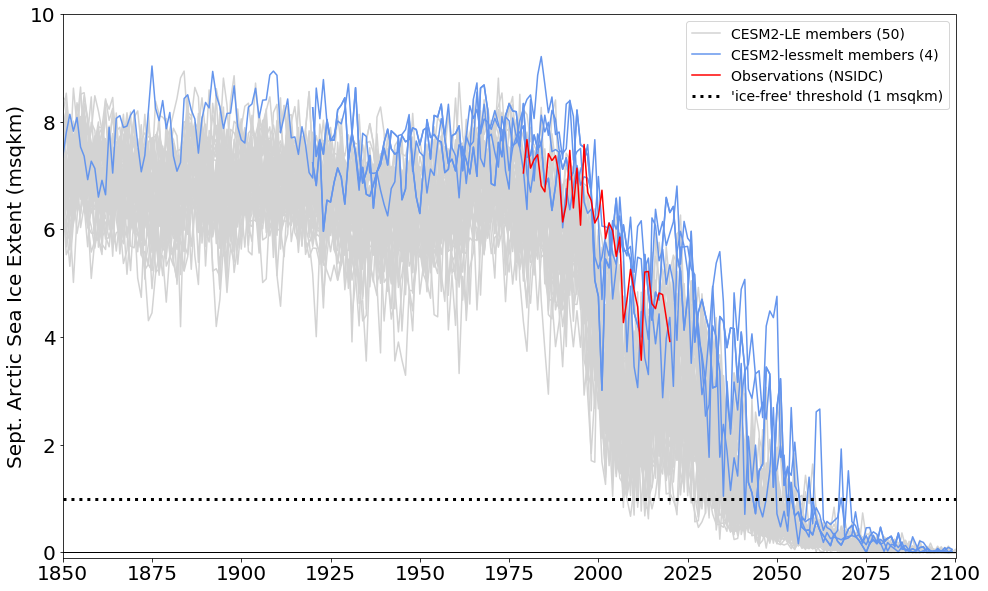

In [24]:
# PLOT SEPTEMBER ARCTIC SEA ICE EXTENT TIMESERIES - all members
fig = plt.figure(figsize=(16, 10));

## plot CESM2 LE ensemble members
for i in range(1,nmembers_CESM2LE+1):
    plt.plot(year_CESM2LE,arctic_CESM2LE.sel(member=i),color="lightgrey", label='_nolegend_');
plt.plot(year_CESM2LE,arctic_CESM2LE.sel(member=29),color="lightgrey", label='CESM2-LE members ('+np.str(nmembers_CESM2LE)+')');  
## plot CESM2 Tuned Ice ensemble members
for i in range(1,4+1):
    plt.plot(year_CESM2TI,arctic_CESM2TI.sel(member=i),color="cornflowerblue", label='_nolegend_');
plt.plot(year_CESM2TI,arctic_CESM2TI.sel(member=3),color="cornflowerblue", label='CESM2-lessmelt members (4)'); 

## plot ensemble mean
#plt.plot(year_CESM2LE,arctic_CESM2LE.mean("member"),color="grey", linewidth=3, label="CESM2-LE ensemble mean");
#plt.plot(year_CESM2TI,arctic_CESM2TI.mean("member"),color="blue", linewidth=3, label="CESM2-lessmelt ensemble mean");

# plot observations
plt.plot(year_obs,ice_extent_obs,color="red", label="Observations (NSIDC)");

#plot ice-free limit
plt.axhline(y=1, color='black', linestyle='dotted', linewidth=3, label="'ice-free' threshold (1 msqkm)");
plt.axhline(y=0, color='black', linewidth=1, label="_nolegend_");
plt.ylabel('Sept. Arctic Sea Ice Extent (msqkm)', fontsize=20);
plt.xticks(np.arange(1850,2101,25),fontsize=20);
plt.yticks(fontsize=20);
plt.xlim((1850,2100));
plt.ylim((-0.1,10));
plt.legend(loc='upper right', fontsize=14);
plt.savefig('CESM2-TA_CESM2-LE_Obs_Sept_ArcticSIE_1850-2100.png', dpi=300, bbox_inches='tight', format='png');

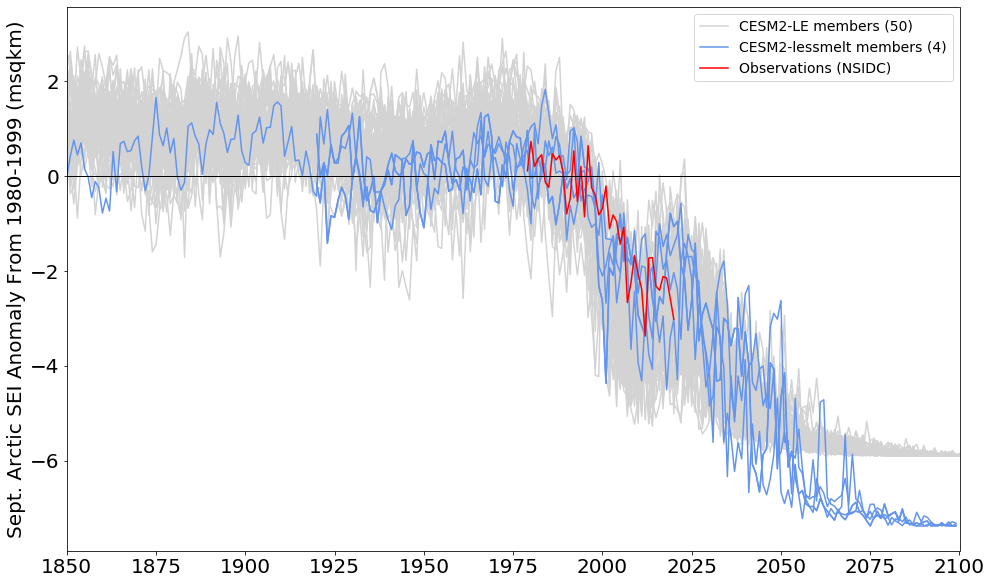

In [25]:
# PLOT SEPTEMBER ARCTIC SEA ICE EXTENT TIMESERIES - ANOMALY - all members

# calculate the mean sea ice over years and over ensemble member
startyear='1980'
endyear='1999'
yearlabel='1980-1999'

## calculate the anomaly time series
mean4anomaly_CESM2LE=arctic_CESM2LE.sel(years=slice(startyear,endyear)).mean('years').mean("member")
#print(mean4anomaly_CESM2LE.values)
arctic_CESM2LE_anom=arctic_CESM2LE
arctic_CESM2LE_anom=arctic_CESM2LE-mean4anomaly_CESM2LE

mean4anomaly_CESM2TI=arctic_CESM2TI.sel(years=slice(startyear,endyear)).mean('years').mean("member")
#print(mean4anomaly_CESM2TI.values)
arctic_CESM2TI_anom=arctic_CESM2TI
arctic_CESM2TI_anom=arctic_CESM2TI-mean4anomaly_CESM2TI

#print(year_obs[1:21])
ice_extent_obs[1:21]
mean4anomaly_obs=np.mean(ice_extent_obs[1:21])
#print(mean4anomaly_obs)
ice_extent_obs_anom=ice_extent_obs-mean4anomaly_obs

### make the anomaly plot

fig = plt.figure(figsize=(16, 10));

## plot CESM2 LE ensemble members
for i in range(1,nmembers_CESM2LE+1):
    plt.plot(year_CESM2LE,arctic_CESM2LE_anom.sel(member=i),color="lightgrey", label='_nolegend_');
plt.plot(year_CESM2LE,arctic_CESM2LE_anom.sel(member=29),color="lightgrey", label='CESM2-LE members ('+np.str(nmembers_CESM2LE)+')');  
## plot CESM2 Tuned Ice ensemble members
for i in range(1,4+1):
    plt.plot(year_CESM2TI,arctic_CESM2TI_anom.sel(member=i),color="cornflowerblue", label='_nolegend_');
plt.plot(year_CESM2TI,arctic_CESM2TI_anom.sel(member=3),color="cornflowerblue", label='CESM2-lessmelt members (4)'); 

## plot ensemble mean
#plt.plot(year_CESM2LE,arctic_CESM2LE_anom.mean("member"),color="grey", linewidth=3, label="CESM2-LE ensemble mean");
#plt.plot(year_CESM2TI,arctic_CESM2TI_anom.mean("member"),color="blue", linewidth=3, label="CESM2-lessmelt ensemble mean");

# plot observations
plt.plot(year_obs,ice_extent_obs_anom,color="red", label="Observations (NSIDC)");

plt.axhline(y=0, color='black', linewidth=1, label="_nolegend_");
plt.ylabel('Sept. Arctic SEI Anomaly From '+yearlabel+' (msqkm)', fontsize=20);
plt.xticks(np.arange(1850,2101,25),fontsize=20);
plt.yticks(fontsize=20);
plt.xlim((1850,2100));
plt.legend(loc='upper right', fontsize=14);
plt.savefig('CESM2-TA_CESM2-LE_Obs_Sept_ArcticSIE_1850-2100_anomaly_from'+yearlabel+'.png', dpi=300, bbox_inches='tight', format='png');

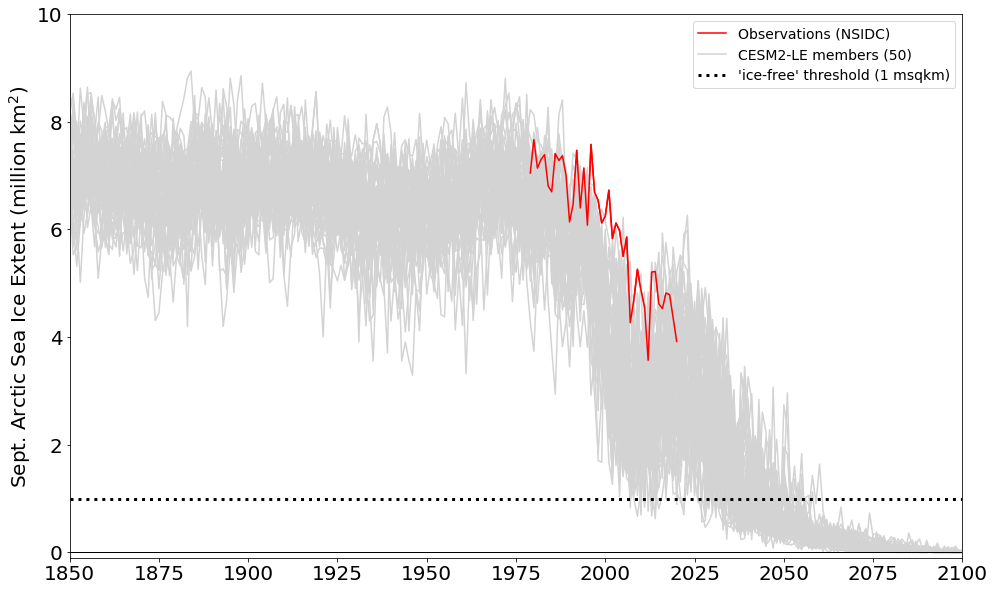

In [26]:
# PLOT SEPTEMBER ARCTIC SEA ICE EXTENT TIMESERIES - all members CESM2-LE and Observations only
fig = plt.figure(figsize=(16, 10));

# plot observations
plt.plot(year_obs,ice_extent_obs,color="red", label="Observations (NSIDC)");

## plot CESM2 LE ensemble members
for i in range(1,nmembers_CESM2LE+1):
    plt.plot(year_CESM2LE,arctic_CESM2LE.sel(member=i),color="lightgrey", label='_nolegend_');
plt.plot(year_CESM2LE,arctic_CESM2LE.sel(member=29),color="lightgrey", label='CESM2-LE members ('+np.str(nmembers_CESM2LE)+')');  

## plot CESM2 ensemble mean (N=50)
#plt.plot(year_CESM2LE,arctic_CESM2LE.mean("member"),color="grey", linewidth=3, label="CESM2-LE ensemble mean (N=50)");

## plot CESM2 Tuned Ice ensemble mean (N=4) and individual members (4)
#plt.plot(year_CESM2TI,arctic_CESM2TI.mean("member"),color="blue", linewidth=3, label="CESM2-lessmelt ensemble mean (N=4)");
#for i in range(1,4+1):
#    plt.plot(year_CESM2TI,arctic_CESM2TI.sel(member=i),color="cornflowerblue", label='_nolegend_');
#plt.plot(year_CESM2TI,arctic_CESM2TI.sel(member=3),color="cornflowerblue", label='CESM2-lessmelt members (4)');    

# plot observations
plt.plot(year_obs,ice_extent_obs,color="red", label="_nolegend_");

#plot ice-free limit
plt.axhline(y=1, color='black', linestyle='dotted', linewidth=3, label="'ice-free' threshold (1 msqkm)");
plt.axhline(y=0, color='black', linewidth=1, label="_nolegend_");
plt.ylabel('Sept. Arctic Sea Ice Extent (million km$^2$)', fontsize=20);
plt.xticks(np.arange(1850,2101,25),fontsize=20);
plt.yticks(fontsize=20);
plt.xlim((1850,2100));
plt.ylim((-0.1,10));
plt.legend(loc='upper right', fontsize=14);
plt.savefig('Figure10a_CESM2-LE_Obs_Sept_ArcticSIE_1850-2100.png', dpi=300, bbox_inches='tight', format='png');
plt.savefig('Figure10a_CESM2-LE_Obs_Sept_ArcticSIE_1850-2100.pdf', dpi=300, bbox_inches='tight', format='pdf');

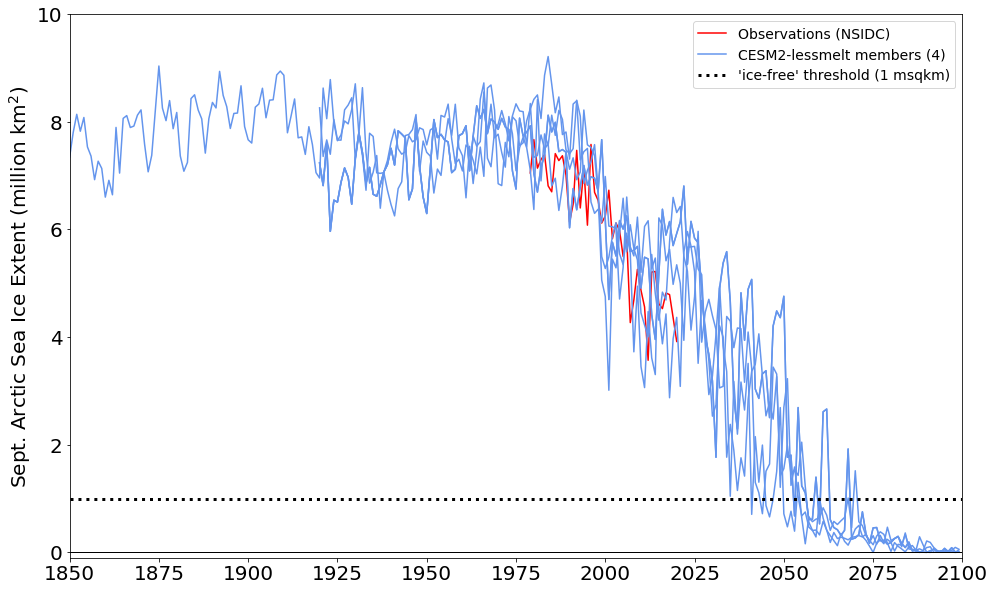

In [29]:
# PLOT SEPTEMBER ARCTIC SEA ICE EXTENT TIMESERIES - all members CESM2-lessmelt and Observations only
fig = plt.figure(figsize=(16, 10));

# plot observations
plt.plot(year_obs,ice_extent_obs,color="red", label="Observations (NSIDC)");

## plot CESM2 Tuned Ice ensemble mean (N=4) and individual members (4)
#plt.plot(year_CESM2TI,arctic_CESM2TI.mean("member"),color="blue", linewidth=3, label="CESM2-lessmelt ensemble mean (N=4)");
for i in range(1,4+1):
    plt.plot(year_CESM2TI,arctic_CESM2TI.sel(member=i),color="cornflowerblue", label='_nolegend_');
plt.plot(year_CESM2TI,arctic_CESM2TI.sel(member=4),color="cornflowerblue", label='CESM2-lessmelt members (4)');    
## "cornflowerblue" for individual ensemble members, "blue" for ensemble means

#plot ice-free limit
plt.axhline(y=1, color='black', linestyle='dotted', linewidth=3, label="'ice-free' threshold (1 msqkm)");
plt.axhline(y=0, color='black', linewidth=1, label="_nolegend_");
plt.ylabel('Sept. Arctic Sea Ice Extent (million km$^2$)', fontsize=20);
plt.xticks(np.arange(1850,2101,25),fontsize=20);
plt.yticks(fontsize=20);
plt.xlim((1850,2100));
plt.ylim((-0.1,10));
plt.legend(loc='upper right', fontsize=14);
plt.savefig('Figure10b_CESM2-lessmelt_Obs_Sept_ArcticSIE_1850-2100.png', dpi=300, bbox_inches='tight', format='png');
plt.savefig('Figure10b_CESM2-lessmelt_Obs_Sept_ArcticSIE_1850-2100.pdf', dpi=300, bbox_inches='tight', format='pdf');

### Plot bootstrapped time series to assess influence of number of ensemble members on comparisons

In [8]:
##### bootstrap the CESM2-LE to find ensemble means using the same number of members as CESM2-lessmelt (N=4)

Nbs=1000
out=np.zeros((len(year_CESM2LE),Nbs))

for ii in range(Nbs):
        mem1=np.random.choice(range(0,49))
        mem2=np.random.choice(range(0,49))
        mem3=np.random.choice(range(0,49))
        mem4=np.random.choice(range(0,49))
        out[:,ii]=np.mean(np.stack((arctic_CESM2LE.sel(member=mem1+1),arctic_CESM2LE.sel(member=mem2+1),arctic_CESM2LE.sel(member=mem3+1),arctic_CESM2LE.sel(member=mem4+1)),axis=-1),axis=1)

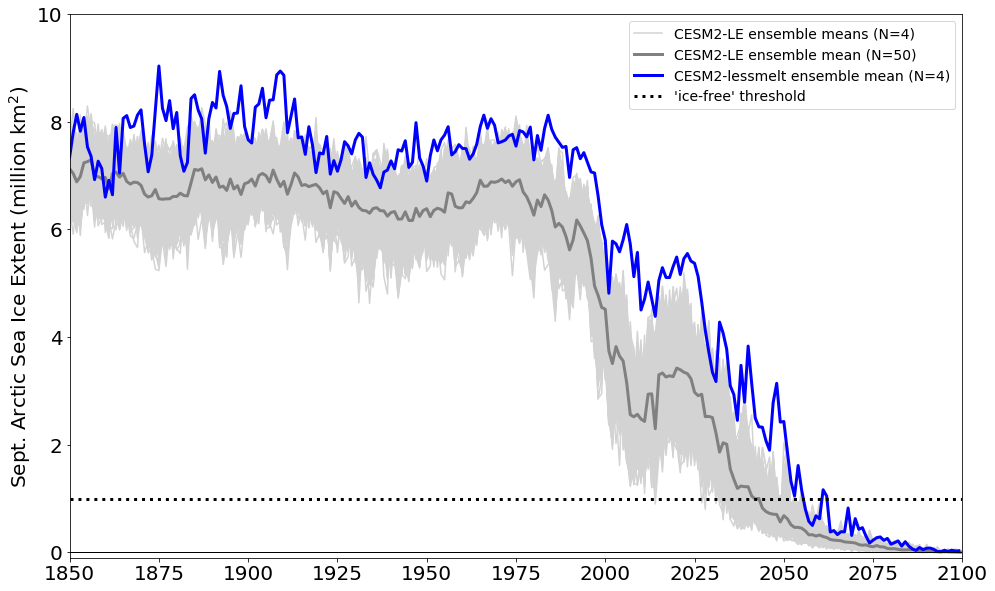

In [9]:
# PLOT SEPTEMBER ARCTIC SEA ICE EXTENT TIMESERIES - ensembles of CESM2-LE with N=4, ensemble mean CESM2-lessmelt (N=4)
fig = plt.figure(figsize=(16, 10));

## plot bootstrapped CESM2 LE ensemble means with N=4 
for ii in range(Nbs):
    plt.plot(year_CESM2LE,out[:,ii],color="lightgrey", label='_nolegend_');
plt.plot(year_CESM2LE,out[:,ii],color="lightgrey", label='CESM2-LE ensemble means (N=4)')

## plot CESM2 ensemble mean (N=50)
plt.plot(year_CESM2LE,arctic_CESM2LE.mean("member"),color="grey", linewidth=3, label="CESM2-LE ensemble mean (N=50)");

## plot CESM2 Tuned Ice ensemble mean (N=4) and individual members (4)
plt.plot(year_CESM2TI,arctic_CESM2TI.mean("member"),color="blue", linewidth=3, label="CESM2-lessmelt ensemble mean (N=4)");
#for i in range(1,4+1):
#    plt.plot(year_CESM2TI,arctic_CESM2TI.sel(member=i),color="cornflowerblue", label='_nolegend_');
#plt.plot(year_CESM2TI,arctic_CESM2TI.sel(member=3),color="cornflowerblue", label='CESM2-lessmelt members (4)');    

## plot observations
#plt.plot(year_obs,ice_extent_obs,color="red", label="Observations (NSIDC)");

#plot ice-free limit
plt.axhline(y=1, color='black', linestyle='dotted', linewidth=3, label="'ice-free' threshold");
plt.axhline(y=0, color='black', linewidth=1, label="_nolegend_");
plt.ylabel('Sept. Arctic Sea Ice Extent (million km$^2$)', fontsize=20);
plt.xticks(np.arange(1850,2101,25),fontsize=20);
plt.yticks(fontsize=20);
plt.xlim((1850,2100));
plt.ylim((-0.1,10));
plt.legend(loc='upper right', fontsize=14);
plt.savefig('Figure12a_CESM2-lessmelt_CESM2-LE_Obs_Sept_ArcticSIE_1850-2100_bootstrap.png', dpi=300, bbox_inches='tight', format='png');
plt.savefig('Figure12a_CESM2-lessmelt_CESM2-LE_Obs_Sept_ArcticSIE_1850-2100_bootstrap.pdf', dpi=300, bbox_inches='tight', format='pdf');

### Compare sea ice variability using standard deviation across ensemble members and year

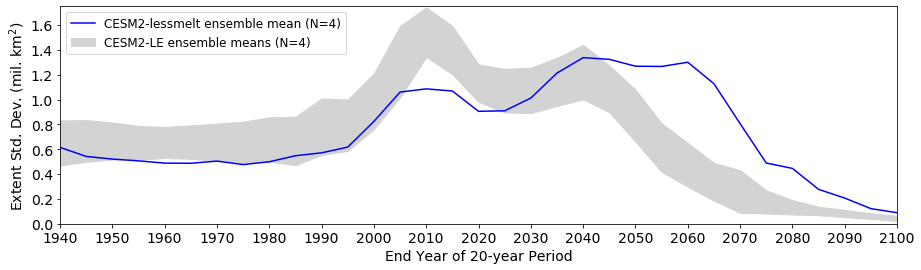

In [10]:
### Calculate standard deviation across years/ensemble members for N=4
skip=5
Nyears=20
Nperiods=np.int((2100-1920-Nyears)/skip)+1
std_LE=np.zeros(Nperiods)
std_TI=np.zeros(Nperiods)
std_out_min95=np.zeros(Nperiods)
std_out_max95=np.zeros(Nperiods)
tstart=np.zeros(Nperiods)

for i in range(Nperiods):
    startyearstd=1920+i*skip
    endyearstd=1920+Nyears+i*skip
    tstart[i]=startyearstd
    std_LE[i]=np.std(arctic_CESM2LE.sel(years=slice(startyearstd,endyearstd)))
    std_TI[i]=np.std(arctic_CESM2TI.sel(years=slice(startyearstd,endyearstd)))
    ### Assess statistical significance using bootstrapping
    Nbs=1000
    std_out=np.zeros(Nbs)
    for ii in range(Nbs):
        mem1=np.random.choice(range(0,49))
        mem2=np.random.choice(range(0,49))
        mem3=np.random.choice(range(0,49))
        mem4=np.random.choice(range(0,49))
        std_out[ii]=np.std(np.stack((arctic_CESM2LE.sel(years=slice(startyearstd,endyearstd)).sel(member=mem1+1),arctic_CESM2LE.sel(years=slice(startyearstd,endyearstd)).sel(member=mem2+1),\
                      arctic_CESM2LE.sel(years=slice(startyearstd,endyearstd)).sel(member=mem3+1),arctic_CESM2LE.sel(years=slice(startyearstd,endyearstd)).sel(member=mem4+1)),axis=-1))

    ### print 95% confidence interval on the std with ensembles of size N=4
    X_avg=np.mean(std_out)
    X_std=np.std(std_out)
    xstd=X_std/np.sqrt(1)
    zstat95=stats.norm.ppf(0.975) ## Python calculates left/lower-tail probabilities by default, so for the 95% confidence, use 0.975
    std_out_min95[i]=X_avg-zstat95*(xstd)
    std_out_max95[i]=X_avg+zstat95*(xstd) 
    
 ## Plot to assess statistical significance
fig = plt.figure(figsize=(15, 4));
plt.fill_between(np.round(tstart+Nyears),std_out_min95, std_out_max95, color='lightgrey', label="CESM2-LE ensemble means (N=4)");
#plt.plot(std_out_min95,color='k');
#plt.plot(std_out_max95,color='k');
plt.plot(np.round(tstart+Nyears),std_TI,color='blue', label="CESM2-lessmelt ensemble mean (N=4)");
plt.xticks(tstart[::2]+Nyears,fontsize=14);
plt.ylabel('Extent Std. Dev. (mil. km$^2$)', fontsize=14);
plt.yticks(fontsize=14);
plt.xlim((1940,2100));
plt.xlabel('End Year of 20-year Period', fontsize=14);
plt.ylim((0,1.75));
plt.legend(loc='upper left', fontsize=12);
plt.savefig('FigureS9_CESM2-lessmelt_CESM2-LE_Sept_ArcticSIE_1850-2100_std.pdf', dpi=300, bbox_inches='tight', format='pdf');

#### alternate Nyears (for reference only)

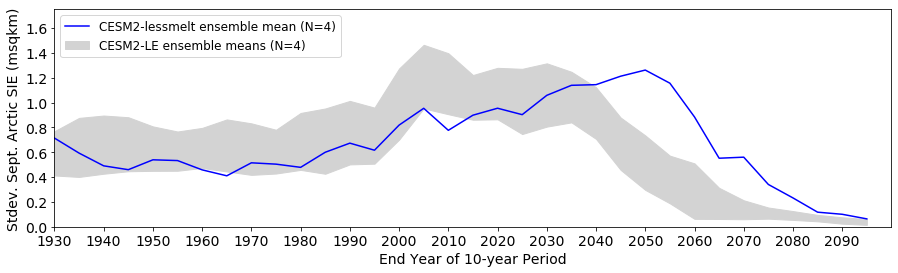

In [11]:
### Calculate standard deviation across years/ensemble members for N=4
skip=5
Nyears=10
Nperiods=np.int((2100-1920-Nyears)/skip)
std_LE=np.zeros(Nperiods)
std_TI=np.zeros(Nperiods)
std_out_min95=np.zeros(Nperiods)
std_out_max95=np.zeros(Nperiods)
tstart=np.zeros(Nperiods)

for i in range(Nperiods):
    startyearstd=1920+i*skip
    endyearstd=1920+Nyears+i*skip
    tstart[i]=startyearstd
    
    std_LE[i]=np.std(arctic_CESM2LE.sel(years=slice(startyearstd,endyearstd)))
    #print(np.round(std_LE.values,4))
    std_TI[i]=np.std(arctic_CESM2TI.sel(years=slice(startyearstd,endyearstd)))
    #print(np.round(std_TI.values,4))

    ### Assess statistical significance using bootstrapping
    Nbs=1000
    std_out=np.zeros(Nbs)

    for ii in range(Nbs):
        mem1=np.random.choice(range(0,49))
        mem2=np.random.choice(range(0,49))
        mem3=np.random.choice(range(0,49))
        mem4=np.random.choice(range(0,49))
        std_out[ii]=np.std(np.stack((arctic_CESM2LE.sel(years=slice(startyearstd,endyearstd)).sel(member=mem1+1),arctic_CESM2LE.sel(years=slice(startyearstd,endyearstd)).sel(member=mem2+1),\
                      arctic_CESM2LE.sel(years=slice(startyearstd,endyearstd)).sel(member=mem3+1),arctic_CESM2LE.sel(years=slice(startyearstd,endyearstd)).sel(member=mem4+1)),axis=-1))

    ##Plot a histogram of the std with ensembles of size N=4
    #fig = plt.figure(figsize=(6, 4));
    #binsize=0.05
    #min4hist=np.min(std_out)-binsize
    #max4hist=np.max(std_out)-binsize
    #nbins=int((max4hist-min4hist)/binsize)
    #plt.hist(std_out,nbins,color='grey',edgecolor='grey', label="CESM2-LE std");
    #plt.xlabel('Std Deviation CESM2-LE with N=4');
    #plt.ylabel('# of Ensemble Means');
    #plt.legend();

    ### print 95% confidence interval on the std with ensembles of size N=4
    X_avg=np.mean(std_out)
    X_std=np.std(std_out)
    xstd=X_std/np.sqrt(1)
    zstat95=stats.norm.ppf(0.975) ## Python calculates left/lower-tail probabilities by default, so for the 95% confidence, use 0.975
    std_out_min95[i]=X_avg-zstat95*(xstd)
    std_out_max95[i]=X_avg+zstat95*(xstd) 

    #print(f'From {startyearstd} to {endyearstd}')
    #print(f'CESM2-LE N=4 95% confidence interval {np.round(std_out_min95[i],4)} to {np.round(std_out_max95[i],4)}') 
    #print(f'CESM2-lessmelt N=4 {np.round(std_TI[i],4)}')  
    
## Plot to assess statistical significance
fig = plt.figure(figsize=(15, 4));
plt.fill_between(np.round(tstart+Nyears),std_out_min95, std_out_max95, color='lightgrey', label="CESM2-LE ensemble means (N=4)");
#plt.plot(std_out_min95,color='k');
#plt.plot(std_out_max95,color='k');
plt.plot(np.round(tstart+Nyears),std_TI,color='blue', label="CESM2-lessmelt ensemble mean (N=4)");
plt.xticks(tstart[::2]+Nyears,fontsize=14);
plt.ylabel('Stdev. Sept. Arctic SIE (msqkm)', fontsize=14);
plt.yticks(fontsize=14);
plt.xlim((1930,2100));
plt.xlabel('End Year of 10-year Period', fontsize=14);
plt.ylim((0,1.75));
plt.legend(loc='upper left', fontsize=12);       

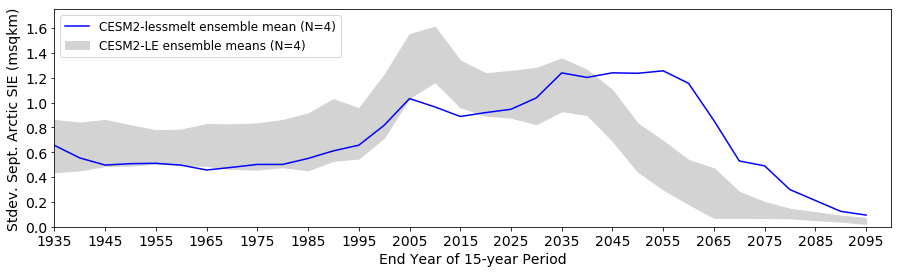

In [12]:
### Calculate standard deviation across years/ensemble members for N=4
skip=5
Nyears=15
Nperiods=np.int((2100-1920-Nyears)/skip)
std_LE=np.zeros(Nperiods)
std_TI=np.zeros(Nperiods)
std_out_min95=np.zeros(Nperiods)
std_out_max95=np.zeros(Nperiods)
tstart=np.zeros(Nperiods)

for i in range(Nperiods):
    startyearstd=1920+i*skip
    endyearstd=1920+Nyears+i*skip
    tstart[i]=startyearstd
    std_LE[i]=np.std(arctic_CESM2LE.sel(years=slice(startyearstd,endyearstd)))
    std_TI[i]=np.std(arctic_CESM2TI.sel(years=slice(startyearstd,endyearstd)))

    ### Assess statistical significance using bootstrapping
    Nbs=1000
    std_out=np.zeros(Nbs)
    for ii in range(Nbs):
        mem1=np.random.choice(range(0,49))
        mem2=np.random.choice(range(0,49))
        mem3=np.random.choice(range(0,49))
        mem4=np.random.choice(range(0,49))
        std_out[ii]=np.std(np.stack((arctic_CESM2LE.sel(years=slice(startyearstd,endyearstd)).sel(member=mem1+1),arctic_CESM2LE.sel(years=slice(startyearstd,endyearstd)).sel(member=mem2+1),\
                      arctic_CESM2LE.sel(years=slice(startyearstd,endyearstd)).sel(member=mem3+1),arctic_CESM2LE.sel(years=slice(startyearstd,endyearstd)).sel(member=mem4+1)),axis=-1))

    ### print 95% confidence interval on the std with ensembles of size N=4
    X_avg=np.mean(std_out)
    X_std=np.std(std_out)
    xstd=X_std/np.sqrt(1)
    zstat95=stats.norm.ppf(0.975) ## Python calculates left/lower-tail probabilities by default, so for the 95% confidence, use 0.975
    std_out_min95[i]=X_avg-zstat95*(xstd)
    std_out_max95[i]=X_avg+zstat95*(xstd) 
 
## Plot to assess statistical significance
fig = plt.figure(figsize=(15, 4));
plt.fill_between(np.round(tstart+Nyears),std_out_min95, std_out_max95, color='lightgrey', label="CESM2-LE ensemble means (N=4)");
#plt.plot(std_out_min95,color='k');
#plt.plot(std_out_max95,color='k');
plt.plot(np.round(tstart+Nyears),std_TI,color='blue', label="CESM2-lessmelt ensemble mean (N=4)");
plt.xticks(tstart[::2]+Nyears,fontsize=14);
plt.ylabel('Stdev. Sept. Arctic SIE (msqkm)', fontsize=14);
plt.yticks(fontsize=14);
plt.xlim((1935,2100));
plt.xlabel('End Year of 15-year Period', fontsize=14);
plt.ylim((0,1.75));
plt.legend(loc='upper left', fontsize=12);


### Calculate and compare first seasonally sea ice-free Arctic

CESM2-LE
CESM2-lessmelt


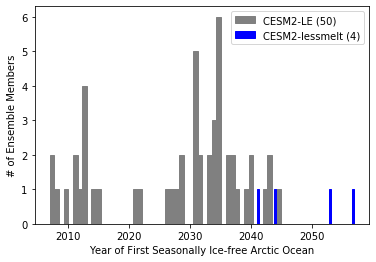

In [12]:
# Calculate what year SEPTEMBER ARCTIC SEA ICE EXTENT first below 1 million sq km.

print("CESM2-LE")
year_LE=np.zeros(nmembers_CESM2LE)
#print(year_LE.shape)
## plot CESM2 LE ensemble members
for i in range(1,nmembers_CESM2LE+1):
    foo=np.where(arctic_CESM2LE.sel(member=i)<1,year_CESM2LE.values,np.nan)
    year_LE[i-1]=np.nanmin(foo)
    #print(np.round(year_LE[i],4))

print("CESM2-lessmelt")
year_TI=np.zeros(4)
#print(year_TI.shape)
## CESM2 Tuned Ice ensemble members
for i in range(1,4+1):
    foo=np.where(arctic_CESM2TI.sel(member=i)<1,year_CESM2TI.values,np.nan)
    year_TI[i-1]=np.nanmin(foo)
    #print(np.round(year_LE[i],4))

##Plot a histogram of the first ice-free Arctic years
binsize=1
year=np.concatenate((year_LE,year_TI))
min4hist=np.round(np.min(year))-binsize
max4hist=np.round(np.max(year))-binsize
nbins=int((max4hist-min4hist)/binsize)
plt.hist(year_LE,nbins,color='grey',edgecolor='grey', label="CESM2-LE (50)");
plt.hist(year_TI,nbins,color='blue',edgecolor='blue', label="CESM2-lessmelt (4)",stacked=True);
plt.xlabel('Year of First Seasonally Ice-free Arctic Ocean');
plt.ylabel('# of Ensemble Members');
plt.legend();
plt.savefig('Figure11c_CESM2-lessmelt_CESM2-LE_firsticefreeArcticOcean.png', dpi=300, bbox_inches='tight', format='png');
plt.savefig('Figure11c_CESM2-lessmelt_CESM2-LE_firsticefreeArcticOcean.pdf', dpi=300, bbox_inches='tight', format='pdf');

In [13]:
print('Range of years for the first ice-free Arctic in CESM2-LE and CESM2-lessmelt')
print(min(year_LE))
print(max(year_LE))
print(min(year_TI))
print(max(year_TI))

Range of years for the first ice-free Arctic in CESM2-LE and CESM2-lessmelt
2007.0
2045.0
2041.0
2057.0


In [14]:
#### Bootstrap the CESM2-LE to place confidence intervals on range of ice free dates

Nbs=1000
year_LE_bs_min=np.empty((Nbs))
year_LE_bs_max=np.empty((Nbs))

for ii in range(Nbs):
    mem1=np.random.choice(range(1,51))
    mem2=np.random.choice(range(1,51))
    mem3=np.random.choice(range(1,51))
    mem4=np.random.choice(range(1,51))
    #print(mem1,mem2,mem3,mem4)
    mem1_year=np.nanmin(np.where(arctic_CESM2LE.sel(member=mem1)<1,year_CESM2LE.values,np.nan))
    mem2_year=np.nanmin(np.where(arctic_CESM2LE.sel(member=mem2)<1,year_CESM2LE.values,np.nan))
    mem3_year=np.nanmin(np.where(arctic_CESM2LE.sel(member=mem3)<1,year_CESM2LE.values,np.nan))
    mem4_year=np.nanmin(np.where(arctic_CESM2LE.sel(member=mem4)<1,year_CESM2LE.values,np.nan))
    year_LE_bs_min[ii]=np.nanmin((np.nanmin(mem1_year),np.nanmin(mem2_year),np.nanmin(mem3_year),np.nanmin(mem4_year)))
    #print(year_LE_bs_min[ii])
    year_LE_bs_max[ii]=np.nanmax((np.nanmin(mem1_year),np.nanmin(mem2_year),np.nanmin(mem3_year),np.nanmin(mem4_year)))
    #print(year_LE_bs_max[ii])       

2028.6338572736859
2047.1321427263142


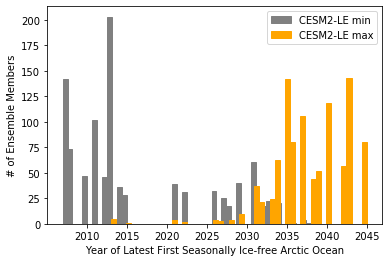

In [15]:
##Plot a histogram of the latest ice-free Arctic years in ensemble members of size N=4, 
##Put 95% confidence interval on min and max values of the CESM2-LE based on ensemble size of 4 (N=4)

binsize=1
year=np.concatenate((year_LE,year_TI))
min4hist=np.round(np.min(year))-binsize
max4hist=np.round(np.max(year))-binsize
nbins=int((max4hist-min4hist)/binsize)
plt.hist(year_LE_bs_min,nbins,color='grey',edgecolor='grey', label="CESM2-LE min");
plt.hist(year_LE_bs_max,nbins,color='orange',edgecolor='orange', label="CESM2-LE max",stacked=True);
plt.xlabel('Year of Latest First Seasonally Ice-free Arctic Ocean');
plt.ylabel('# of Ensemble Members');
plt.legend();

### print 95% confidence interval on the latest first ice-free Arctic year in an ensemble of N=4
X_avg=np.mean(year_LE_bs_max)
X_std=np.std(year_LE_bs_max)
xstd=X_std/np.sqrt(1)
zstat95=stats.norm.ppf(0.975) ## Python calculates left/lower-tail probabilities by default, so for the 95% confidence, use 0.975
year_LE_bs_min95=X_avg-zstat95*(xstd)
year_LE_bs_max95=X_avg+zstat95*(xstd) 

print(year_LE_bs_min95)
print(year_LE_bs_max95) 

### Calculate and Plot 20-year trends - only look at 20 year trends!

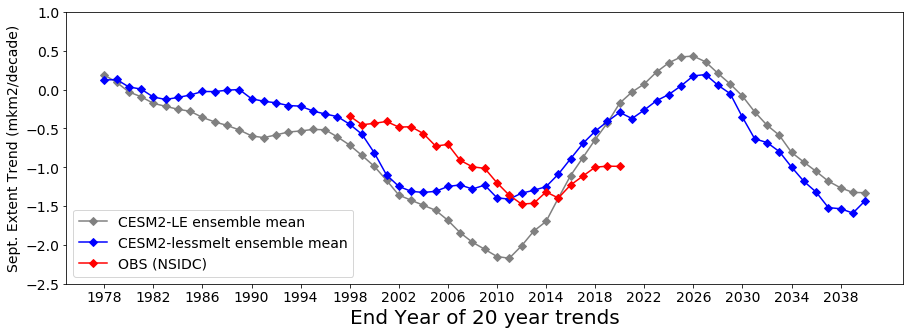

In [16]:
# Calculate SEPTEMBER ARCTIC SEA ICE EXTENT 20-year TRENDS
ntrends=40+23
trendlength=20

trendendyear=np.ones(ntrends)

### calculate the ensemble mean value, then take the trend (preferred)
slopes_LE=np.ones(ntrends)
tstarts=year_CESM2LE.sel(years=slice(1979,1979+ntrends-1))
for i in range(0,ntrends):
    tstart=(1979-20)+i
    tend=tstart+trendlength-1
    trendendyear[i]=(1979-20)+(trendlength-1)+i
    y=arctic_CESM2LE.sel(years=slice(tstart,tend)).mean("member")
    x=np.arange(1,trendlength+1,1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    slopes_LE[i]=slope

slopes_TI=np.ones(ntrends)
for i in range(0,ntrends):
    tstart=(1979-20)+i
    tend=tstart+trendlength-1
    y=arctic_CESM2TI.sel(years=slice(tstart,tend)).mean("member")
    x=np.arange(1,trendlength+1,1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    slopes_TI[i]=slope
    
### calculate the trend in observations
ntrends_obs=23  ##32 for 10-year, 27 for 15-year, 22 for 20-year
slopes_obs=np.ones(ntrends_obs)
trendendyear_obs=np.ones(ntrends_obs)
for i in range(0,ntrends_obs):
    #print(f"{tstart} to {tend}")
    tstart=0+i
    tend=tstart+trendlength
    trendendyear_obs[i]=1979+(trendlength-1)+i
    y=ice_extent_obs[tstart:tend]
    x=np.arange(1,trendlength+1,1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    slopes_obs[i]=slope
    #print('Slope, a1 (million sq. km /year):',round(slope,2))

##### Compare the trend of the ensemble mean CESM2-LE vs. ensemble mean CESM2-lessmelt and obs

fig = plt.figure(figsize=(15, 5));
plt.plot(trendendyear,slopes_LE*10,color='grey',marker="D", label="CESM2-LE ensemble mean");
plt.plot(trendendyear,slopes_TI*10,color='blue',marker="D", label="CESM2-lessmelt ensemble mean");
plt.plot(trendendyear_obs,slopes_obs*10,color='r',marker="D", label="OBS (NSIDC)");
plt.xlabel('End Year of '+np.str(trendlength)+' year trends', fontsize=20);
plt.ylabel('Sept. Extent Trend (mkm2/decade)', fontsize=14);
plt.xticks(trendendyear[::4],fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-2.5,1.0)); 
plt.legend(loc='lower left', fontsize=14);     

In [17]:
print(trendendyear_obs)

[1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009.
 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020.]


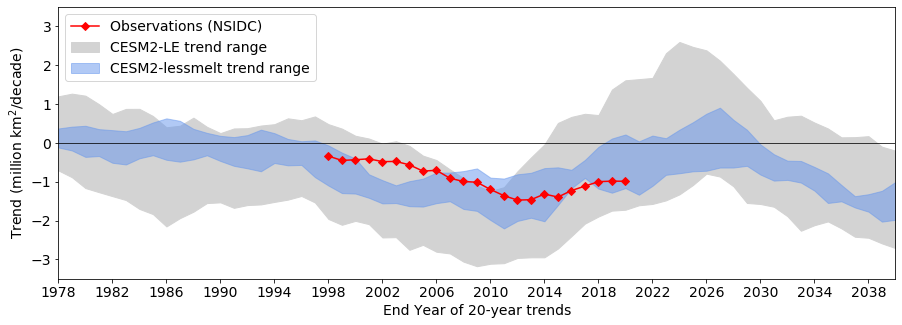

In [18]:
#### Find full range of trends estimated with 1 ensemble member (N=1) in CESM2-LE and CESM2-lessmelt

ntrends=40+23
trendlength=20
trendendyear=np.ones(ntrends)
slopes_LE_onemem=np.empty((50,ntrends))
slopes_LE_onemem_avg=np.empty((ntrends))
slopes_LE_onemem_min=np.empty((ntrends))
slopes_LE_onemem_max=np.empty((ntrends))

for i in range(0,ntrends):
    tstart=(1979-20)+i
    tend=tstart+trendlength-1
    trendendyear[i]=(1979-20)+(trendlength-1)+i
    #print(f"{tstart} to {tend}")
    trendendyear[i]=1979+trendlength+i
    inputdata=arctic_CESM2LE.sel(years=slice(tstart,tend))
    for ii in range(50):
        y=inputdata[ii,:]
        #print(y.shape)
        x=np.arange(1,trendlength+1,1)
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        slopes_LE_onemem[ii,i]=slope
    slopes_LE_onemem_min[i]=np.min(slopes_LE_onemem[:,i])
    slopes_LE_onemem_max[i]=np.max(slopes_LE_onemem[:,i])

slopes_TI_onemem=np.empty((4,ntrends))
slopes_TI_onemem_avg=np.empty((ntrends))
slopes_TI_onemem_min=np.empty((ntrends))
slopes_TI_onemem_max=np.empty((ntrends))

for i in range(0,ntrends):
    tstart=(1979-20)+i
    tend=tstart+trendlength-1
    trendendyear[i]=(1979-20)+(trendlength-1)+i
    #print(f"{tstart} to {tend}")
    inputdata=arctic_CESM2TI.sel(years=slice(tstart,tend))
    for ii in range(4):
        y=inputdata[ii,:]
        #print(y.shape)
        x=np.arange(1,trendlength+1,1)
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        slopes_TI_onemem[ii,i]=slope
    slopes_TI_onemem_min[i]=np.min(slopes_TI_onemem[:,i])
    slopes_TI_onemem_max[i]=np.max(slopes_TI_onemem[:,i])   

### Compare all with N=1 range
fig = plt.figure(figsize=(15, 5));
plt.plot(trendendyear,np.zeros(ntrends),color='black',linewidth=0.75);
plt.plot(trendendyear_obs,slopes_obs*10,color='r',marker="D", label="Observations (NSIDC)");
plt.fill_between(trendendyear,slopes_LE_onemem_min[:]*10, slopes_LE_onemem_max[:]*10, color='lightgrey', label="CESM2-LE trend range");
plt.fill_between(trendendyear,slopes_TI_onemem_min[:]*10, slopes_TI_onemem_max[:]*10, color='cornflowerblue', alpha=0.5, label="CESM2-lessmelt trend range");
plt.xlabel('End Year of '+np.str(trendlength)+'-year trends', fontsize=14);
plt.ylabel('Trend (million km$^2$/decade)', fontsize=14);
plt.xticks(trendendyear[::4],fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-3.5,3.5)); 
plt.xlim((min(trendendyear),max(trendendyear)));
plt.legend(loc='upper left', fontsize=14); 
plt.savefig('Figure10c_CESM2-lessmelt_CESM2-LE_Obs_Sept_ArcticSIE_1850-2100_trends.png', dpi=300, bbox_inches='tight', format='png');
plt.savefig('Figure10c_CESM2-lessmelt_CESM2-LE_Obs_Sept_ArcticSIE_1850-2100_trends.pdf', dpi=300, bbox_inches='tight', format='pdf');

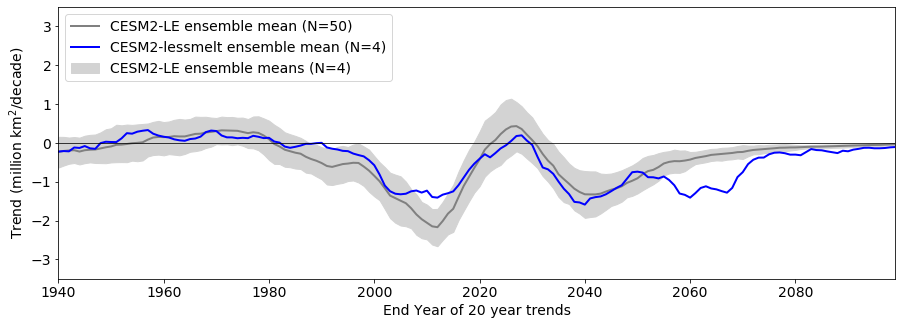

In [19]:
#### Bootstrap the CESM2-LE to place confidence intervals on trends estimated with only 4 ensemble members (N=4)

yearstart=1920
ntrends=160
trendlength=20

Nbs=1000
trendendyear=np.ones(ntrends)
slopes_LE_bs=np.empty((Nbs,ntrends))
slopes_LE_bs_avg=np.empty((ntrends))
slopes_LE_bs_min95=np.empty((ntrends))
slopes_LE_bs_max95=np.empty((ntrends))

for i in range(0,ntrends):
    tstart=yearstart+i
    tend=tstart+trendlength-1
    #print(f"{tstart} to {tend}")
    trendendyear[i]=yearstart+trendlength+i
    inputdata=arctic_CESM2LE.sel(years=slice(tstart,tend))
    for ii in range(Nbs):
        mem1=np.random.choice(range(0,49))
        mem2=np.random.choice(range(0,49))
        mem3=np.random.choice(range(0,49))
        mem4=np.random.choice(range(0,49))
        #print(mem1,mem2,mem3,mem4)
        y=np.mean(np.stack((inputdata[mem1,:],inputdata[mem2,:],inputdata[mem3,:],inputdata[mem4,:]),axis=-1),axis=1)
        #print(y.shape)
        x=np.arange(1,trendlength+1,1)
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        slopes_LE_bs[ii,i]=slope
    ##Plot a histogram of the bootstrapped trends
    #binsize=0.25
    #min4hist=np.round(np.min(slopes_LE_bs[:,i]),1)-binsize
    #max4hist=np.round(np.max(slopes_LE_bs[:,i]),1)-binsize
    #nbins=int((max4hist-min4hist)/binsize)
    #print(nbins)
    #plt.hist(slopes_LE_bs[:,i],nbins,edgecolor='black');
    #plt.xlabel('Mean X');
    #plt.ylabel('Count');
    #plt.title('Bootstrapped Randomly Selected Mean Value');
    ### find 95% confidence intervals on bootstrappedtrend
    #print(slopes_LE_bs[:,i])
    X_avg=np.mean(slopes_LE_bs[:,i])
    X_std=np.std(slopes_LE_bs[:,i])
    xstd=X_std/np.sqrt(1)
    zstat95=stats.norm.ppf(0.975) ## Python calculates left/lower-tail probabilities by default, so for the 95% confidence, use 0.975
    slopes_LE_bs_min95[i]=X_avg-zstat95*(xstd)
    slopes_LE_bs_max95[i]=X_avg+zstat95*(xstd) 
    slopes_LE_bs_avg[i]=X_avg
    #print(slopes_LE_bs_min95[i])
    #print(slopes_LE_bs_max95[i])
    #print(slopes_LE_bs_avg[i])
    
### calculate the ensemble mean value, then take the trend (preferred)
slopes_LE=np.ones(ntrends)
tstarts=year_CESM2LE.sel(years=slice(1979,1979+ntrends-1))
for i in range(0,ntrends):
    tstart=yearstart+i
    tend=tstart+trendlength-1
    trendendyear[i]=yearstart+trendlength+i
    y=arctic_CESM2LE.sel(years=slice(tstart,tend)).mean("member")
    x=np.arange(1,trendlength+1,1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    slopes_LE[i]=slope

slopes_TI=np.ones(ntrends)
for i in range(0,ntrends):
    tstart=yearstart+i
    tend=tstart+trendlength-1
    y=arctic_CESM2TI.sel(years=slice(tstart,tend)).mean("member")
    x=np.arange(1,trendlength+1,1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    slopes_TI[i]=slope   
    
### Compare the trend of the ensemble mean - CESM2-LE vs. CESM2-lessmelt

fig = plt.figure(figsize=(15, 5));
plt.plot(trendendyear,slopes_LE*10,color='grey',linewidth=2,label="CESM2-LE ensemble mean (N=50)");
plt.plot(trendendyear,slopes_TI*10,color='blue',linewidth=2,label="CESM2-lessmelt ensemble mean (N=4)");

## add grey shading showing the 95% confidence intervals on trends calculated with 4 ensemble members from the CESM2-LE
plt.fill_between(trendendyear,slopes_LE_bs_min95[:]*10, slopes_LE_bs_max95[:]*10, color='lightgrey', label="CESM2-LE ensemble means (N=4)");

plt.plot(trendendyear,np.zeros(ntrends),color='black',linewidth=0.75);
plt.xlabel('End Year of '+np.str(trendlength)+' year trends', fontsize=14);
plt.ylabel('Trend (million km$^2$/decade)', fontsize=14);
plt.xticks(trendendyear[::20],fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-3.5,3.5)); 
plt.xlim((min(trendendyear),max(trendendyear)));
plt.legend(loc='upper left', fontsize=14);    
plt.savefig('Figure12c_CESM2-lessmelt_CESM2-LE_Sept_ArcticSIE_1850-2100_bootstrap.png', dpi=300, bbox_inches='tight', format='png');
plt.savefig('Figure12c_CESM2-lessmelt_CESM2-LE_Sept_ArcticSIE_1850-2100_bootstrap.pdf', dpi=300, bbox_inches='tight', format='pdf');

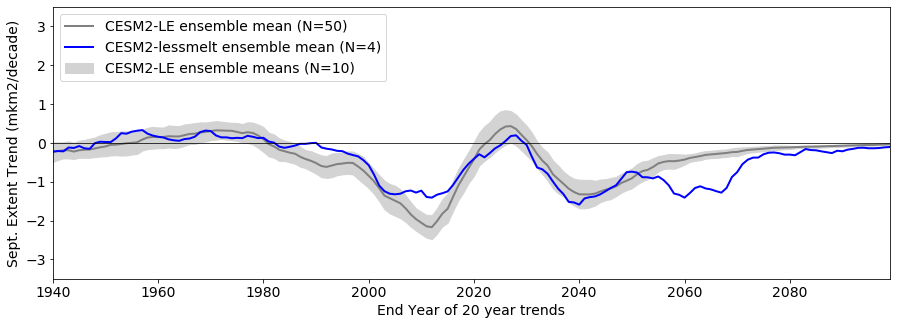

In [20]:
#### Bootstrap the CESM2-LE to place confidence intervals on trends estimated with 10 ensemble members (N=10)
#### Just for fun to see if the spread goes down...

yearstart=1920
ntrends=160
trendlength=20

Nbs=1000
trendendyear=np.ones(ntrends)
slopes_LE_bs=np.empty((Nbs,ntrends))
slopes_LE_bs_avg=np.empty((ntrends))
slopes_LE_bs_min95=np.empty((ntrends))
slopes_LE_bs_max95=np.empty((ntrends))

for i in range(0,ntrends):
    tstart=yearstart+i
    tend=tstart+trendlength-1
    #print(f"{tstart} to {tend}")
    trendendyear[i]=yearstart+trendlength+i
    inputdata=arctic_CESM2LE.sel(years=slice(tstart,tend))
    for ii in range(Nbs):
        mem1=np.random.choice(range(0,49))
        mem2=np.random.choice(range(0,49))
        mem3=np.random.choice(range(0,49))
        mem4=np.random.choice(range(0,49))
        mem5=np.random.choice(range(0,49))
        mem6=np.random.choice(range(0,49))
        mem7=np.random.choice(range(0,49))
        mem8=np.random.choice(range(0,49))
        mem9=np.random.choice(range(0,49))
        mem9=np.random.choice(range(0,49))
        mem10=np.random.choice(range(0,49))
        y=np.mean(np.stack((inputdata[mem1,:],inputdata[mem2,:],inputdata[mem3,:],inputdata[mem4,:], \
                            inputdata[mem5,:],inputdata[mem6,:],inputdata[mem7,:],inputdata[mem8,:], \
                            inputdata[mem9,:],inputdata[mem10,:]),axis=-1),axis=1)
        #print(y.shape)
        x=np.arange(1,trendlength+1,1)
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        slopes_LE_bs[ii,i]=slope
    ##Plot a histogram of the bootstrapped trends
    #binsize=0.25
    #min4hist=np.round(np.min(slopes_LE_bs[:,i]),1)-binsize
    #max4hist=np.round(np.max(slopes_LE_bs[:,i]),1)-binsize
    #nbins=int((max4hist-min4hist)/binsize)
    #print(nbins)
    #plt.hist(slopes_LE_bs[:,i],nbins,edgecolor='black');
    #plt.xlabel('Mean X');
    #plt.ylabel('Count');
    #plt.title('Bootstrapped Randomly Selected Mean Value');
    ### find 95% confidence intervals on bootstrappedtrend
    #print(slopes_LE_bs[:,i])
    X_avg=np.mean(slopes_LE_bs[:,i])
    X_std=np.std(slopes_LE_bs[:,i])
    xstd=X_std/np.sqrt(1)
    zstat95=stats.norm.ppf(0.975) ## Python calculates left/lower-tail probabilities by default, so for the 95% confidence, use 0.975
    slopes_LE_bs_min95[i]=X_avg-zstat95*(xstd)
    slopes_LE_bs_max95[i]=X_avg+zstat95*(xstd) 
    slopes_LE_bs_avg[i]=X_avg
    #print(slopes_LE_bs_min95[i])
    #print(slopes_LE_bs_max95[i])
    #print(slopes_LE_bs_avg[i])
    
### calculate the ensemble mean value, then take the trend (preferred)
slopes_LE=np.ones(ntrends)
tstarts=year_CESM2LE.sel(years=slice(1979,1979+ntrends-1))
for i in range(0,ntrends):
    tstart=yearstart+i
    tend=tstart+trendlength-1
    trendendyear[i]=yearstart+trendlength+i
    y=arctic_CESM2LE.sel(years=slice(tstart,tend)).mean("member")
    x=np.arange(1,trendlength+1,1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    slopes_LE[i]=slope

slopes_TI=np.ones(ntrends)
for i in range(0,ntrends):
    tstart=yearstart+i
    tend=tstart+trendlength-1
    y=arctic_CESM2TI.sel(years=slice(tstart,tend)).mean("member")
    x=np.arange(1,trendlength+1,1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    slopes_TI[i]=slope   
    
### Compare the trend of the ensemble mean - CESM2-LE vs. CESM2-lessmelt

fig = plt.figure(figsize=(15, 5));
plt.plot(trendendyear,slopes_LE*10,color='grey',linewidth=2,label="CESM2-LE ensemble mean (N=50)");
plt.plot(trendendyear,slopes_TI*10,color='blue',linewidth=2,label="CESM2-lessmelt ensemble mean (N=4)");

## add grey shading showing the 95% confidence intervals on trends calculated with 4 ensemble members from the CESM2-LE
plt.fill_between(trendendyear,slopes_LE_bs_min95[:]*10, slopes_LE_bs_max95[:]*10, color='lightgrey', label="CESM2-LE ensemble means (N=10)");

plt.plot(trendendyear,np.zeros(ntrends),color='black',linewidth=0.75);
plt.xlabel('End Year of '+np.str(trendlength)+' year trends', fontsize=14);
plt.ylabel('Sept. Extent Trend (mkm2/decade)', fontsize=14);
plt.xticks(trendendyear[::20],fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-3.5,3.5)); 
plt.xlim((min(trendendyear),max(trendendyear)));
plt.legend(loc='upper left', fontsize=14);     

### What happens if you change the order - i.e., find trend and then average across ensemble members?

In [ ]:
### calculate the trend in each ensemble member, then average trends 
## Note: not using, not preferred method for looking at forced trend but here for reference...

slopes_LE_all=np.ones((ntrends, nmembers_CESM2LE))
for j in range(0,nmembers_CESM2LE):
    #print('working on member'+np.str(j))
    for i in range(0,ntrends):
        tstart=1979+i
        #print(tstart)
        tend=tstart+trendlength-1
        y=arctic_CESM2LE.sel(years=slice(tstart,tend)).sel(member=j+1)
        x=np.arange(1,trendlength+1,1)
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        slopes_LE_all[i,j]=slope
        #print(slope)
        #plt.plot(y)

### Plot the trend of the ensemble mean
### I want to look at the trend of the ensemble mean
#fig = plt.figure(figsize=(20, 5));
#plt.plot(tstarts,slopes_LE,color='k',marker="D");
#plt.plot(tstarts,np.mean(slopes_LE_all,axis=1),color="grey", label='_nolegend_')
#for i in range(1,nmembers_CESM2LE):
#    plt.plot(tstarts,slopes_LE_all[:,i-1],color="grey", label='_nolegend_');
#plt.xlabel('Start Year of '+np.str(trendlength)+' year trends', fontsize=20);
#plt.ylabel('Sept. Extent Trend (mkm2/year)', fontsize=14);
#plt.xticks(tstarts[::5],fontsize=14);
#plt.yticks(fontsize=14);
#plt.ylim((-1.5,1.5));

### Plots for Dave Schneider - CESM1-LE vs. CESM2-CMIP6/CESM2-CMIP5

In [ ]:
fig = plt.figure(figsize=(16, 10));

## plot CESM1 large ensemble
for i in range(1,40+1):
    plt.plot(year_CESM,arctic_CESM.sel(member=i),color="lightblue", label='_nolegend_');
plt.plot(year_CESM,arctic_CESM.sel(member=40),color="lightblue", label='CESM1-LE members (40)'); 
plt.plot(year_CESM,arctic_CESM.mean("member"),color="blue", linewidth=3, label="CESM1-LE ensemble mean");
## plot CESM2 CMIP5 ensemble members
for i in range(1,6+1):
    plt.plot(year_CESM2CMIP5,arctic_CESM2CMIP5.sel(member=i),color="pink", label='_nolegend_');
plt.plot(year_CESM2CMIP5,arctic_CESM2CMIP5.sel(member=5),color="pink", label='CESM2-CMIP5 members (6)'); 

## plot ensemble mean
plt.plot(year_CESM2CMIP5,arctic_CESM2CMIP5.mean("member"),color="red", linewidth=3, label="CESM2-CMIP5 ensemble mean");
plt.plot(year_CESM,arctic_CESM.mean("member"),color="blue", linewidth=3, label="_nolegend_");

# plot observations
plt.plot(year_obs,ice_extent_obs,color="black", linewidth=3, label="Observations (NSIDC)");

#plot ice-free limit
#plt.axhline(y=1, color='grey', linewidth=3, label="'ice-free' threshold (1 msqkm)");
#plt.axhline(y=0, color='black', linewidth=1, label="_nolegend_");
plt.ylabel('Sept. Arctic Sea Ice Extent (msqkm)', fontsize=20);
plt.xticks(np.arange(1850,2101,25),fontsize=20);
plt.yticks(fontsize=20);
plt.xlim((1850,2100));
plt.ylim((-0.05,10));
plt.legend(loc='lower left', fontsize=12,framealpha=1.0);
plt.savefig('CESM2-CMIP5_CESM1-LE_Obs_Sept_ArcticSIE_1850-2020.png', dpi=300, bbox_inches='tight', format='png');
plt.savefig('CESM2-CMIP5_CESM1-LE_Obs_Sept_ArcticSIE_1850-2020.eps', dpi=300, bbox_inches='tight', format='eps');

In [ ]:
fig = plt.figure(figsize=(16, 10));

## plot CESM1 large ensemble
for i in range(1,40+1):
    plt.plot(year_CESM,arctic_CESM.sel(member=i),color="lightblue", label='_nolegend_');
plt.plot(year_CESM,arctic_CESM.sel(member=40),color="lightblue", label='CESM1-LE members (40)'); 
plt.plot(year_CESM,arctic_CESM.mean("member"),color="blue", linewidth=3, label="CESM1-LE ensemble mean");
## plot CESM2 CMIP5 ensemble members
for i in range(1,6+1):
    plt.plot(year_CESM2CMIP5,arctic_CESM2CMIP5.sel(member=i),color="pink", label='_nolegend_');
plt.plot(year_CESM2CMIP5,arctic_CESM2CMIP5.sel(member=5),color="pink", label='CESM2-CMIP5 members (6)'); 

## plot ensemble mean
plt.plot(year_CESM2CMIP5,arctic_CESM2CMIP5.mean("member"),color="red", linewidth=3, label="CESM2-CMIP5 ensemble mean");
plt.plot(year_CESM,arctic_CESM.mean("member"),color="blue", linewidth=3, label="_nolegend_");

# plot observations
plt.plot(year_obs,ice_extent_obs,color="black", linewidth=3, label="Observations (NSIDC)");

#plot ice-free limit
#plt.axhline(y=1, color='grey', linewidth=3, label="'ice-free' threshold (1 msqkm)");
#plt.axhline(y=0, color='black', linewidth=1, label="_nolegend_");
plt.ylabel('Sept. Arctic Sea Ice Extent (msqkm)', fontsize=20);
plt.xticks(np.arange(1850,2101,25),fontsize=20);
plt.yticks(fontsize=20);
plt.xlim((1850,2100));
plt.ylim((-0.05,10));
plt.legend(loc='lower left', fontsize=12,framealpha=1.0);
plt.savefig('CESM2-CMIP5_CESM1-LE_Obs_Sept_ArcticSIE_1850-2020.png', dpi=300, bbox_inches='tight', format='png');
#plt.savefig('CESM2-CMIP5_CESM1-LE_Obs_Sept_ArcticSIE_1850-2020.eps', dpi=300, bbox_inches='tight', format='eps');

In [ ]:
fig = plt.figure(figsize=(16, 10));

## plot CESM1 large ensemble
#for i in range(1,40+1):
#    plt.plot(year_CESM,arctic_CESM.sel(member=i),color="cornflowerblue", label='_nolegend_');
#plt.plot(year_CESM,arctic_CESM.sel(member=40),color="cornflowerblue", label='CESM1-LE members (40)'); 
## plot CESM2 LE ensemble members
#for i in range(1,nmembers_CESM2LE+1):
#    plt.plot(year_CESM2LE,arctic_CESM2LE.sel(member=i),color="lightgrey", alpha=0.5, label='_nolegend_');
#plt.plot(year_CESM2LE,arctic_CESM2LE.sel(member=29),color="lightgrey",  alpha=0.5, label='CESM2-LE members ('+np.str(nmembers_CESM2LE)+')');  
## plot CESM2 CMIP5 ensemble members
for i in range(1,6+1):
    plt.plot(year_CESM2CMIP5,arctic_CESM2CMIP5.sel(member=i),color="pink", label='_nolegend_');
plt.plot(year_CESM2CMIP5,arctic_CESM2CMIP5.sel(member=5),color="pink", label='CESM2-CMIP5 members (6)'); 
## plot CESM2 Tuned Ice ensemble members
for i in range(1,4+1):
    plt.plot(year_CESM2TI,arctic_CESM2TI.sel(member=i),color="cornflowerblue", label='_nolegend_');
plt.plot(year_CESM2TI,arctic_CESM2TI.sel(member=3),color="cornflowerblue", label='CESM2-lessmelt members (4)'); 

## plot ensemble mean
#plt.plot(year_CESM,arctic_CESM.mean("member"),color="blue", linewidth=3, label="CESM1-LE ensemble mean");
plt.plot(year_CESM2CMIP5,arctic_CESM2CMIP5.mean("member"),color="red", linewidth=3, label="CESM2-CMIP5 ensemble mean");
#plt.plot(year_CESM2LE,arctic_CESM2LE.mean("member"),color="grey", linewidth=3, label="CESM2-LE ensemble mean");
plt.plot(year_CESM2TI,arctic_CESM2TI.mean("member"),color="blue", linewidth=3, label="CESM2-lessmelt ensemble mean");

# plot observations
plt.plot(year_obs,ice_extent_obs,color="black", linewidth=3, label="Observations (NSIDC)");

#plot ice-free limit
#plt.axhline(y=1, color='grey', linewidth=3, label="'ice-free' threshold (1 msqkm)");
#plt.axhline(y=0, color='black', linewidth=1, label="_nolegend_");
plt.ylabel('Sept. Arctic Sea Ice Extent (msqkm)', fontsize=20);
plt.xticks(np.arange(1850,2101,25),fontsize=20);
plt.yticks(fontsize=20);
plt.xlim((1850,2100));
plt.ylim((-0.05,10));
plt.legend(loc='lower left', fontsize=12,framealpha=1.0);
plt.savefig('CESM2-CMIP5_CESM2-lessmelt_Obs_Sept_ArcticSIE_1850-2020.png', dpi=300, bbox_inches='tight', format='png');

In [ ]:
fig = plt.figure(figsize=(16, 10));

## plot CESM1 large ensemble
#for i in range(1,40+1):
#    plt.plot(year_CESM,arctic_CESM.sel(member=i),color="cornflowerblue", label='_nolegend_');
#plt.plot(year_CESM,arctic_CESM.sel(member=40),color="cornflowerblue", label='CESM1-LE members (40)'); 
## plot CESM2 LE ensemble members
for i in range(1,nmembers_CESM2LE+1):
    plt.plot(year_CESM2LE,arctic_CESM2LE.sel(member=i),color="lightgrey", alpha=0.5, label='_nolegend_');
plt.plot(year_CESM2LE,arctic_CESM2LE.sel(member=29),color="lightgrey",  alpha=0.5, label='CESM2-LE members ('+np.str(nmembers_CESM2LE)+')');  
## plot CESM2 CMIP5 ensemble members
for i in range(1,6+1):
    plt.plot(year_CESM2CMIP5,arctic_CESM2CMIP5.sel(member=i),color="pink", label='_nolegend_');
plt.plot(year_CESM2CMIP5,arctic_CESM2CMIP5.sel(member=5),color="pink", label='CESM2-CMIP5 members (6)'); 
## plot CESM2 Tuned Ice ensemble members
#for i in range(1,4+1):
#    plt.plot(year_CESM2TI,arctic_CESM2TI.sel(member=i),color="cornflowerblue", label='_nolegend_');
#plt.plot(year_CESM2TI,arctic_CESM2TI.sel(member=3),color="cornflowerblue", label='CESM2-lessmelt members (4)'); 

## plot ensemble mean
#plt.plot(year_CESM,arctic_CESM.mean("member"),color="blue", linewidth=3, label="CESM1-LE ensemble mean");
plt.plot(year_CESM2CMIP5,arctic_CESM2CMIP5.mean("member"),color="red", linewidth=3, label="CESM2-CMIP5 ensemble mean");
plt.plot(year_CESM2LE,arctic_CESM2LE.mean("member"),color="grey", linewidth=3, label="CESM2-LE ensemble mean");
#plt.plot(year_CESM2TI,arctic_CESM2TI.mean("member"),color="blue", linewidth=3, label="CESM2-lessmelt ensemble mean");

# plot observations
plt.plot(year_obs,ice_extent_obs,color="black", linewidth=3, label="Observations (NSIDC)");

#plot ice-free limit
#plt.axhline(y=1, color='grey', linewidth=3, label="'ice-free' threshold (1 msqkm)");
#plt.axhline(y=0, color='black', linewidth=1, label="_nolegend_");
plt.ylabel('Sept. Arctic Sea Ice Extent (msqkm)', fontsize=20);
plt.xticks(np.arange(1850,2101,25),fontsize=20);
plt.yticks(fontsize=20);
plt.xlim((1850,2100));
plt.ylim((-0.05,10));
plt.legend(loc='lower left', fontsize=12,framealpha=1.0);
plt.savefig('CESM2-CMIP5_CESM2-LE_Obs_Sept_ArcticSIE_1850-2020.png', dpi=300, bbox_inches='tight', format='png');

In [ ]:
fig = plt.figure(figsize=(16, 10));

## plot CESM1 large ensemble
for i in range(1,40+1):
    plt.plot(year_CESM,arctic_CESM.sel(member=i),color="lightgrey", label='_nolegend_');
plt.plot(year_CESM,arctic_CESM.sel(member=40),color="lightgrey", label='CESM1-LE members (40)'); 
## plot CESM2 LE ensemble members
#for i in range(1,nmembers_CESM2LE+1):
#    plt.plot(year_CESM2LE,arctic_CESM2LE.sel(member=i),color="lightgrey", alpha=0.5, label='_nolegend_');
#plt.plot(year_CESM2LE,arctic_CESM2LE.sel(member=29),color="lightgrey",  alpha=0.5, label='CESM2-LE members ('+np.str(nmembers_CESM2LE)+')');  
## plot CESM2 CMIP5 ensemble members
for i in range(1,6+1):
    plt.plot(year_CESM2CMIP5,arctic_CESM2CMIP5.sel(member=i),color="pink", label='_nolegend_');
plt.plot(year_CESM2CMIP5,arctic_CESM2CMIP5.sel(member=5),color="pink", label='CESM2-CMIP5 members (6)'); 
## plot CESM2 Tuned Ice ensemble members
#for i in range(1,4+1):
#    plt.plot(year_CESM2TI,arctic_CESM2TI.sel(member=i),color="cornflowerblue", label='_nolegend_');
#plt.plot(year_CESM2TI,arctic_CESM2TI.sel(member=3),color="cornflowerblue", label='CESM2-lessmelt members (4)'); 

## plot ensemble mean
plt.plot(year_CESM,arctic_CESM.mean("member"),color="grey", linewidth=3, label="CESM1-LE ensemble mean");
plt.plot(year_CESM2CMIP5,arctic_CESM2CMIP5.mean("member"),color="red", linewidth=3, label="CESM2-CMIP5 ensemble mean");
#plt.plot(year_CESM2LE,arctic_CESM2LE.mean("member"),color="grey", linewidth=3, label="CESM2-LE ensemble mean");
#plt.plot(year_CESM2TI,arctic_CESM2TI.mean("member"),color="blue", linewidth=3, label="CESM2-lessmelt ensemble mean");

# plot observations
plt.plot(year_obs,ice_extent_obs,color="black", linewidth=3, label="Observations (NSIDC)");

#plot ice-free limit
#plt.axhline(y=1, color='grey', linewidth=3, label="'ice-free' threshold (1 msqkm)");
#plt.axhline(y=0, color='black', linewidth=1, label="_nolegend_");
plt.ylabel('Sept. Arctic Sea Ice Extent (msqkm)', fontsize=20);
plt.xticks(np.arange(1850,2101,25),fontsize=20);
plt.yticks(fontsize=20);
plt.xlim((1850,2100));
plt.ylim((-0.05,10));
plt.legend(loc='lower left', fontsize=12,framealpha=1.0);
plt.savefig('CESM2-CMIP5_CESM1-LE_Obs_Sept_ArcticSIE_1850-2020.png', dpi=300, bbox_inches='tight', format='png');

### more sea ice evolution plots for reference

In [ ]:
# MORE PLOT SEPTEMBER ARCTIC SEA ICE EXTENT TIMESERIES
fig = plt.figure(figsize=(16, 10));

## plot CESM2 LE ensemble members
for i in range(1,nmembers_CESM2LE+1):
    plt.plot(year_CESM2LE,arctic_CESM2LE.sel(member=i),color="lightgrey", label='_nolegend_');
plt.plot(year_CESM2LE,arctic_CESM2LE.sel(member=29),color="lightgrey", label='CESM2-LE members ('+np.str(nmembers_CESM2LE)+')'); 
## plot CESM2 CMIP6 ensemble members
for i in range(1,10+1):
    plt.plot(year_CESM2,arctic_CESM2.sel(member=i),color="pink", label='_nolegend_');
plt.plot(year_CESM2,arctic_CESM2.sel(member=10),color="pink", label='CESM2-CMIP6 members (10)'); 

## plot ensemble mean
plt.plot(year_CESM2LE,arctic_CESM2LE.mean("member"),color="black", linewidth=3, label="CESM2-LE ensemble mean");
plt.plot(year_CESM2,arctic_CESM2.mean("member"),color="brown", linewidth=3, label="CESM2-CMIP6 ensemble mean");

# plot observations
plt.plot(year_obs,ice_extent_obs,color="red", linewidth=3, label="Observations (NSIDC)");

#plot ice-free limit
plt.axhline(y=1, color='grey', linewidth=3, label="'ice-free' threshold (1 msqkm)");
plt.axhline(y=0, color='black', linewidth=1, label="_nolegend_");
plt.ylabel('Sept. Arctic Sea Ice Extent (msqkm)', fontsize=20);
plt.xticks(np.arange(1850,2101,25),fontsize=20);
plt.yticks(fontsize=20);
plt.xlim((1850,2100));
plt.ylim((-0.1,10));
plt.legend(loc='upper right', fontsize=14);
plt.savefig('CESM2-CMIP6_CESM2-LE_Obs_Sept_ArcticSIE_1850-2100.png', dpi=300, bbox_inches='tight', format='png');
#plt.savefig('CESM2-CMIP6_CESM2-LE_Obs_Sept_ArcticSIE_1850-2100.eps', dpi=300, bbox_inches='tight', format='eps');

In [ ]:
# PLOT SEPTEMBER ARCTIC SEA ICE EXTENT TIMESERIES
fig = plt.figure(figsize=(16, 10));

## plot CESM1 large ensemble
for i in range(1,40+1):
    plt.plot(year_CESM,arctic_CESM.sel(member=i),color="lightblue", label='_nolegend_');
plt.plot(year_CESM,arctic_CESM.sel(member=40),color="lightblue", label='CESM1-LE members (40)'); 
plt.plot(year_CESM,arctic_CESM.mean("member"),color="blue", linewidth=3, label="CESM1-LE ensemble mean");
## plot CESM2 LE
for i in range(1,nmembers_CESM2LE+1):
    plt.plot(year_CESM2LE,arctic_CESM2LE.sel(member=i),color="lightgrey", label='_nolegend_');
plt.plot(year_CESM2LE,arctic_CESM2LE.sel(member=29),color="lightgrey", label='CESM2-LE members ('+np.str(nmembers_CESM2LE)+')'); 
plt.plot(year_CESM2LE,arctic_CESM2LE.mean("member"),color="grey", linewidth=3, label="CESM2-LE ensemble mean");
## plot CESM2 CMIP6 - looks a lot like the CESM2-LE (do not include)
#for i in range(1,10+1):
#    plt.plot(year_CESM2,arctic_CESM2.sel(member=i),color="pink", label='_nolegend_');
#plt.plot(year_CESM2,arctic_CESM2.sel(member=10),color="pink", label='CESM2-CMIP6 members (10)'); 
#plt.plot(year_CESM2,arctic_CESM2.mean("member"),color="red", linewidth=3, label="CESM2-CMIP6 ensemble mean");

## plot LE ensemble means again so that they are on top
plt.plot(year_CESM2LE,arctic_CESM2LE.mean("member"),color="black", linewidth=3, label="_nolegend_");
plt.plot(year_CESM,arctic_CESM.mean("member"),color="blue", linewidth=3, label="_nolegend_");

# plot observations
plt.plot(year_obs,ice_extent_obs,color="red", linewidth=3, label="Observations (NSIDC)");

#plot ice-free limit
plt.axhline(y=1, color='grey', linewidth=3, label="'ice-free' threshold (1 msqkm)");
plt.axhline(y=0, color='black', linewidth=1, label="_nolegend_");
plt.ylabel('Sept. Arctic Sea Ice Extent (msqkm)', fontsize=20);
plt.xticks(np.arange(1850,2101,25),fontsize=20);
plt.yticks(fontsize=20);
plt.xlim((1850,2100));
plt.ylim((-0.1,10));
plt.legend(loc='upper right', fontsize=14);
plt.savefig('CESM1-LE_CESM2-LE_Obs_Sept_ArcticSIE_1850-2100.png', dpi=300, bbox_inches='tight', format='png');